In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
import os
num=[]
Z = []
path = '/Users/liuyingjie/Downloads/data3/'
filenames = os.listdir(path)
indexs = []
for filename in filenames:
    if filename.startswith("."):
        continue
    indexs.append(int(filename))
indexs.sort()
#print(indexs)
for index in indexs:
    file_path = path + str(index)
    with open(file_path,'r',encoding='utf8') as f:
        lines=f.readlines()
    for i in range(99, 119):
        temps = lines[i].split()
        point=[]
        point.append(int(temps[2]))
        point.append(int(temps[3]))
        num.append(point)
    for line in lines:
        temps = line.split()
        size = len(temps)
        if(size == 11 and temps[0]=='10000000'):
            Z.append(int(float(temps[1])*37000000000))
            Z.append(int(float(temps[6])*37000000000))
        if(size == 16 and temps[0] == '10000000'):
            Z.append(int(float(temps[1])*37000000000))
            Z.append(int(float(temps[6])*37000000000))
            Z.append(int(float(temps[11])*37000000000))
            
for i in range(len(Z)):
    num[i].append(Z[i])
print(num)

[[90, 90, 583490], [91, 90, 584970], [92, 90, 586080], [93, 90, 587042], [94, 90, 588004], [95, 90, 588929], [96, 90, 589817], [97, 90, 590335], [98, 90, 590742], [99, 90, 590927], [100, 90, 591038], [101, 90, 591593], [102, 90, 590853], [103, 90, 590261], [104, 90, 589669], [105, 90, 588929], [106, 90, 588855], [107, 90, 587153], [108, 90, 586043], [109, 90, 584674], [90, 89, 581381], [91, 89, 582861], [92, 89, 584082], [93, 89, 585414], [94, 89, 586450], [95, 89, 587449], [96, 89, 588078], [97, 89, 588855], [98, 89, 589188], [99, 89, 589336], [100, 89, 589262], [101, 89, 589225], [102, 89, 589188], [103, 89, 588744], [104, 89, 587893], [105, 89, 587116], [106, 89, 586265], [107, 89, 585303], [108, 89, 584341], [109, 89, 582972], [90, 88, 579531], [91, 88, 581011], [92, 88, 582232], [93, 88, 583453], [94, 88, 584600], [95, 88, 585488], [96, 88, 586413], [97, 88, 587264], [98, 88, 587671], [99, 88, 587486], [100, 88, 587375], [101, 88, 587301], [102, 88, 587227], [103, 88, 586782], [10

In [4]:
x1=[]
x2=[]

def getCircle(p1, p2, p3):
    circle=[]
    x21 = p2[0] - p1[0]
    y21 = p2[1] - p1[1]
    x32 = p3[0] - p2[0]
    y32 = p3[1] - p2[1]
    # three colinear
    if (x21 * y32 - x32 * y21 == 0 or x21==0):
        return None
    xy21 = p2[0] * p2[0] - p1[0] * p1[0] + p2[1]* p2[1]- p1[1] * p1[1]
    xy32 = p3[0] * p3[0] - p2[0] * p2[0] + p3[1] * p3[1] - p2[1] * p2[1]
    y0 = (x32 * xy21 - x21 * xy32) / (2 * (y21 * x32 - y32 * x21))
    x0 = (xy21 - 2 * y0 * y21) / (2.0 * x21)
    circle.append(x0)
    circle.append(y0)
    return circle


num.sort(key=lambda k:k[2],reverse=False)
#print(num)
res=[]
#误差设计
interval=370;
for i in range(len(num)):
    for j in range(i+1,len(num)):
        if num[j][2]-num[i][2]>interval:
            break
        for n in range(j+1,len(num)):
            if num[n][2]-num[i][2]>interval:
                break
            ans=getCircle(num[i],num[j],num[n])
            if ans:
                x1.append(ans[0])
                x2.append(ans[1])
print(x1,x2)


[100.0, 100.0, 100.02380952380953, 99.95454545454545, 100.0, 100.0, 100.16666666666667, 97.5, 100.0, 100.5, 100.0, 100.0, 100.0, 100.5, 99.88461538461539, 99.73809523809524, 100.5, 101.5, 100.15, 101.0, 100.78571428571428, 100.22, 98.5, 100.0, 101.16666666666666, 100.29166666666667, 100.5, 100.5, 100.0, 101.0, 101.0, 100.0, 98.5, 98.5, 100.0, 100.0, 99.5, 99.5, 103.0, 100.5, 99.72727272727272, 100.0, 101.83333333333333, 101.0, 99.73809523809524, 100.5, 101.5, 100.0, 101.5, 99.60526315789474, 101.5, 99.7, 99.5, 99.5, 100.5, 100.0, 100.0, 100.5, 100.0, 101.0, 100.0, 100.5, 101.0, 100.5, 100.0, 101.5, 100.0, 101.5, 99.5, 99.95454545454545, 100.0, 100.0, 100.5, 98.5, 99.85, 100.05555555555556, 100.01851851851852, 100.0, 100.5, 100.5, 100.5, 100.0, 100.1153846153846, 100.375, 100.0, 99.97368421052632, 99.5, 100.0, 100.0, 100.22, 100.78571428571428, 98.5, 100.5, 99.0, 100.5, 99.5, 100.5, 98.5, 99.0, 99.5, 100.5, 101.0, 100.0, 101.0, 101.5, 100.5, 100.0, 99.875, 102.5, 101.5, 100.0, 100.25, 1

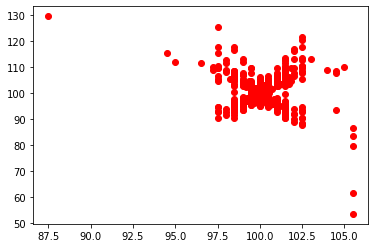

[[100.         106.        ]
 [100.          99.75      ]
 [100.02380952  99.92857143]
 ...
 [101.5         95.5       ]
 [101.          97.        ]
 [100.5         99.5       ]]


In [5]:
plt.plot(x1,x2,'ro')
plt.show()
x_=np.array(x1)
x_.reshape(-1,1)
y_=np.array(x2)
y_.reshape(-1,1)

xn=np.array([x_,y_])
Xn=np.transpose(xn)
dataLen = len(Xn)
print(Xn)

In [23]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=5,gamma=0.01)
model.fit(Xn)
pre_y = model.labels_
for i in range(5):
    print(Xn[pre_y==i])



[[100.         106.        ]
 [100.          99.75      ]
 [100.02380952  99.92857143]
 ...
 [101.5         95.5       ]
 [101.          97.        ]
 [100.5         99.5       ]]
[[105.5  53.5]
 [105.5  61.5]]
[[ 87.5 129.5]]
[[ 97.5 125.5]]
[[ 98.5 116.5]
 [ 98.5 117.5]
 [102.5 117.5]
 [102.5 120.5]
 [102.  116. ]
 [102.5 121.5]
 [102.  117. ]
 [ 94.5 115.5]
 [ 97.5 115.5]
 [ 97.5 117.5]]
[[ 99.8 117.5]]
